# **Practical 4**
### Linear  Regression  with  Regularization  (without  using sklearn  or  equivalent  library)  and  Simple  and  Multiple Linear Regression with and without regularization using Sklearn (2 Hrs)

# **Loading Dataset**

In [4]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

#loading dataset
X,y = datasets.load_boston(return_X_y = True) 
X_train_actual = X[0:400, : ] #400x13

#adding x0 = 1 as 1st column for all rows
X_train = np.zeros((X_train_actual.shape[0],X_train_actual.shape[1]+1))
X_train[:,0] = np.ones((X_train_actual.shape[0]))

X_train[:,1:] = X_train_actual

y_train = y[0:400]

#print(y_train.shape)
#print(X_train.shape)

#testData
X_test_actual = X[400:506,:]
X_test = np.zeros((X_test_actual.shape[0],X_test_actual.shape[1]+1))

X_test[:,0] = np.ones((X_test_actual.shape[0]))
X_test[:,1:] = X_test_actual

y_test = y[400:506]

#scaling
sc = StandardScaler()
sc.fit(X_train[:,1:])

X_train[:,1:] = sc.transform(X_train[:,1:])
X_test[:,1:] = sc.transform(X_test[:,1:])

# **Regularisation - Normal Equation**

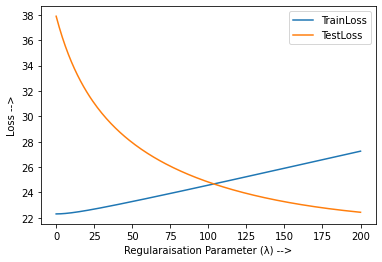

In [5]:
#Regularisation - NORMAL EQUATION
reg_matrix = np.zeros((X_train.shape[1],X_train.shape[1]))
loss_train = []
loss_test = []

reg_parameter = np.arange(0,201)

for x in range(1,14):
  reg_matrix[x,x] = 1

for i in range(len(reg_parameter)):
  reg_theta = ( np.linalg.pinv( (X_train.T).dot(X_train) + (reg_parameter[i] * reg_matrix) ) ).dot( (X_train.T).dot(y_train) )
  
  loss_train.append((sum((X_train.dot(reg_theta) - y_train)**2))/400)
  loss_test.append((sum((X_test.dot(reg_theta) - y_test)**2))/106)

plt.plot(reg_parameter,loss_train)
plt.plot(reg_parameter,loss_test)
plt.xlabel("Regularaisation Parameter (\u03BB) -->")
plt.ylabel("Loss -->")
plt.legend(["TrainLoss","TestLoss"])
plt.show()

# **Regularisation - Gradient Descent**

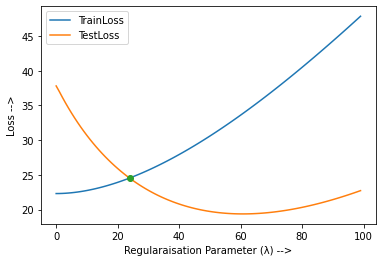

In [9]:
#regularisation - GRADIENT DESCENT
from shapely.geometry import LineString

alpha = 0.05
iter = 1000
m = 400
n = 14

loss_train_gd = []
loss_test_gd = []
array_of_costs = []

reg_parameter_gd = np.arange(0,100)


reg_theta_gd = np.zeros((X_train.shape[1]))

for j in range(0,len(reg_parameter_gd)):
  cost = []
  for i in range(iter):
    updated_theta = np.zeros((X_train.shape[1]))
    h = np.dot(X_train,reg_theta_gd[:])
    err = h - y_train
    
    for k in range(n):
      updated_theta[k] = np.sum(err*(X_train.T)[k])
      
    reg_theta_gd[:] = reg_theta_gd[:] * (1-((reg_parameter_gd[j]*alpha)/m)) - alpha* (1/m) * updated_theta[:]
    
    cost.append((1/2*m)*sum(err**2))
  array_of_costs.append(cost)

  loss_train_gd.append((sum((X_train.dot(reg_theta_gd) - y_train)**2))/400)
  loss_test_gd.append((sum((X_test.dot(reg_theta_gd) - y_test)**2))/106) 
  

plt.plot(reg_parameter_gd,loss_train_gd)
plt.plot(reg_parameter_gd,loss_test_gd)
plt.xlabel("Regularaisation Parameter (\u03BB) -->")
plt.ylabel("Loss -->")
plt.legend(["TrainLoss","TestLoss"])

first_line = LineString(np.column_stack((reg_parameter_gd, loss_train_gd)))
second_line = LineString(np.column_stack((reg_parameter_gd, loss_test_gd)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

